In [1]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.5.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.11.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.4.4+cuda11.cudnn82 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.4.4 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [7]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1920,1080
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 525.85.12'
b'NVIDIA Corporation'


In [3]:
def  addvertex(x,y):
  GL_vertex2f(x/(WIDTH/2),y/(HEIGHT/2))

In [10]:

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

#### co-ordinates of all numbers from 0-9 ####
numDraw = {
    0: [[200, 200, 201, 300], [150, 299, 201, 300],
        [149, 199, 150, 299], [149, 199, 200, 200]],
    1: [[200, 200, 201, 300]],
    2: [[200, 250, 201, 300], [150, 299, 201, 300],
        [149, 199, 150, 250], [149, 199, 200, 200],
        [149, 250, 200, 251]],
    3: [[150, 299, 201, 300], [149, 250, 200, 251],
        [149, 199, 200, 200], [201, 300, 200, 200]],
    4: [[150, 299, 149, 250], [149, 250, 200, 251],
        [201, 300, 200, 200]],
    5: [[200, 200, 201, 250], [150, 299, 201, 300],
        [149, 250, 150, 299], [149, 199, 200, 200],
        [149, 250, 200, 251]],
    6: [[200, 200, 201, 250], [150, 299, 201, 300],
        [149, 199, 150, 299], [149, 199, 200, 200],
        [149, 250, 200, 251]],
    7: [[200, 200, 201, 300], [150, 299, 201, 300]],
    8: [[200, 200, 201, 300], [150, 299, 201, 300],
        [149, 199, 150, 299], [149, 199, 200, 200],
        [149, 250, 200, 251]],
    9: [[200, 200, 201, 300], [150, 299, 201, 300],
        [149, 250, 150, 299], [149, 199, 200, 200],
        [149, 250, 200, 251]],
}

def findZone(dx,dy):  #### function to find out in which zone the co-ordinates are in
    if abs(dx)>abs(dy):
        if dx>0 and dy>0: return 0
        elif dx<0 and dy>0: return 3
        elif dx<0  and dy<0: return 4
        elif dx>0 and dy<0: return 7
    else:
        if dx > 0 and dy > 0: return 1
        elif dx < 0 and dy > 0: return 2
        elif dx < 0 and dy < 0: return 5
        elif dx > 0 and dy < 0: return 6

def convertZone_0_to_n(zone,x1,y1): #### function to convert to zone 0 to given zone
    if zone == 0: return x1,y1
    elif zone == 1: return y1,x1
    elif zone == 2: return -y1,x1
    elif zone == 3: return -x1,y1

    elif zone == 4: return -x1,-y1
    elif zone == 5: return -y1,-x1
    elif zone == 6: return y1,-x1
    elif zone == 7: return x1,-y1

def convertZone_n_to_0(zone,x1,y1,x2,y2): #### function to convert to given zone to zone 0
    if zone == 0: return x1,y1,x2,y2
    elif zone == 1: return y1,x1,y2,x2
    elif zone == 2: return y1,-x1,y2,-x2
    elif zone == 3: return -x1,y1,-x2,y2

    elif zone == 4: return -x1,-y1,-x2,-y2
    elif zone == 5: return -y1,-x1,-y2,-x2
    elif zone == 6: return -y1,x1,-y2,x2
    elif zone == 7: return x1,-y1,x2,-y2



def midPointAlgorithm(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1

    D = 2*dy - dx
    D_NE = 2*(dy-dx)
    DE = 2*dy
    x = x1
    y = y1

    l=[[x,y]]
    # iterating through the values of X
    while (x < x2): ### checking corner cases
        x = x + 1
        if (D < 0):  ## case → 1
            D+=DE
        else:        ## case → 2
            D+=D_NE
            y = y + 1
        l.append([x,y])
    return l


def run(x1,y1,x2,y2):
    dx = x2-x1   ## finding out del x
    dy = y2-y1   ## finding out del y
    zone = findZone(dx,dy)   ## finding out zone number
    x1,y1,x2,y2 = convertZone_n_to_0(zone,x1,y1,x2,y2)  ## converting to zone 0 from given zone by identifying the co-ords
    line_list = midPointAlgorithm(x1,y1,x2,y2)  ## generating the list of co-ords using mid-point algo
    for i in range(len(line_list)):
        x,y = convertZone_0_to_n(zone,line_list[i][0],line_list[i][1])    ## converting the calculated co-ords from zone 0 to given zones

        gl.glPointSize(2)    
        gl.glBegin(gl.GL_POINTS)
        gl.glVertex2f(x/1920,y/1080)
        gl.glEnd()

def loadDigits(n):    ### takes ID as input, finds out the co-ord for the numbers, RUNS() main function utilizing the midpoint algo and converting functions.
    for i in numDraw:
        if i == int(n[-2]):
            for k in numDraw[i]:
                run(k[0], k[1], k[2], k[3])
        if i == int(n[-1]):
            for k in numDraw[i]:
                run(k[0]+80, k[1], k[2]+80, k[3])
ID:int = input()
loadDigits(ID)


20101073


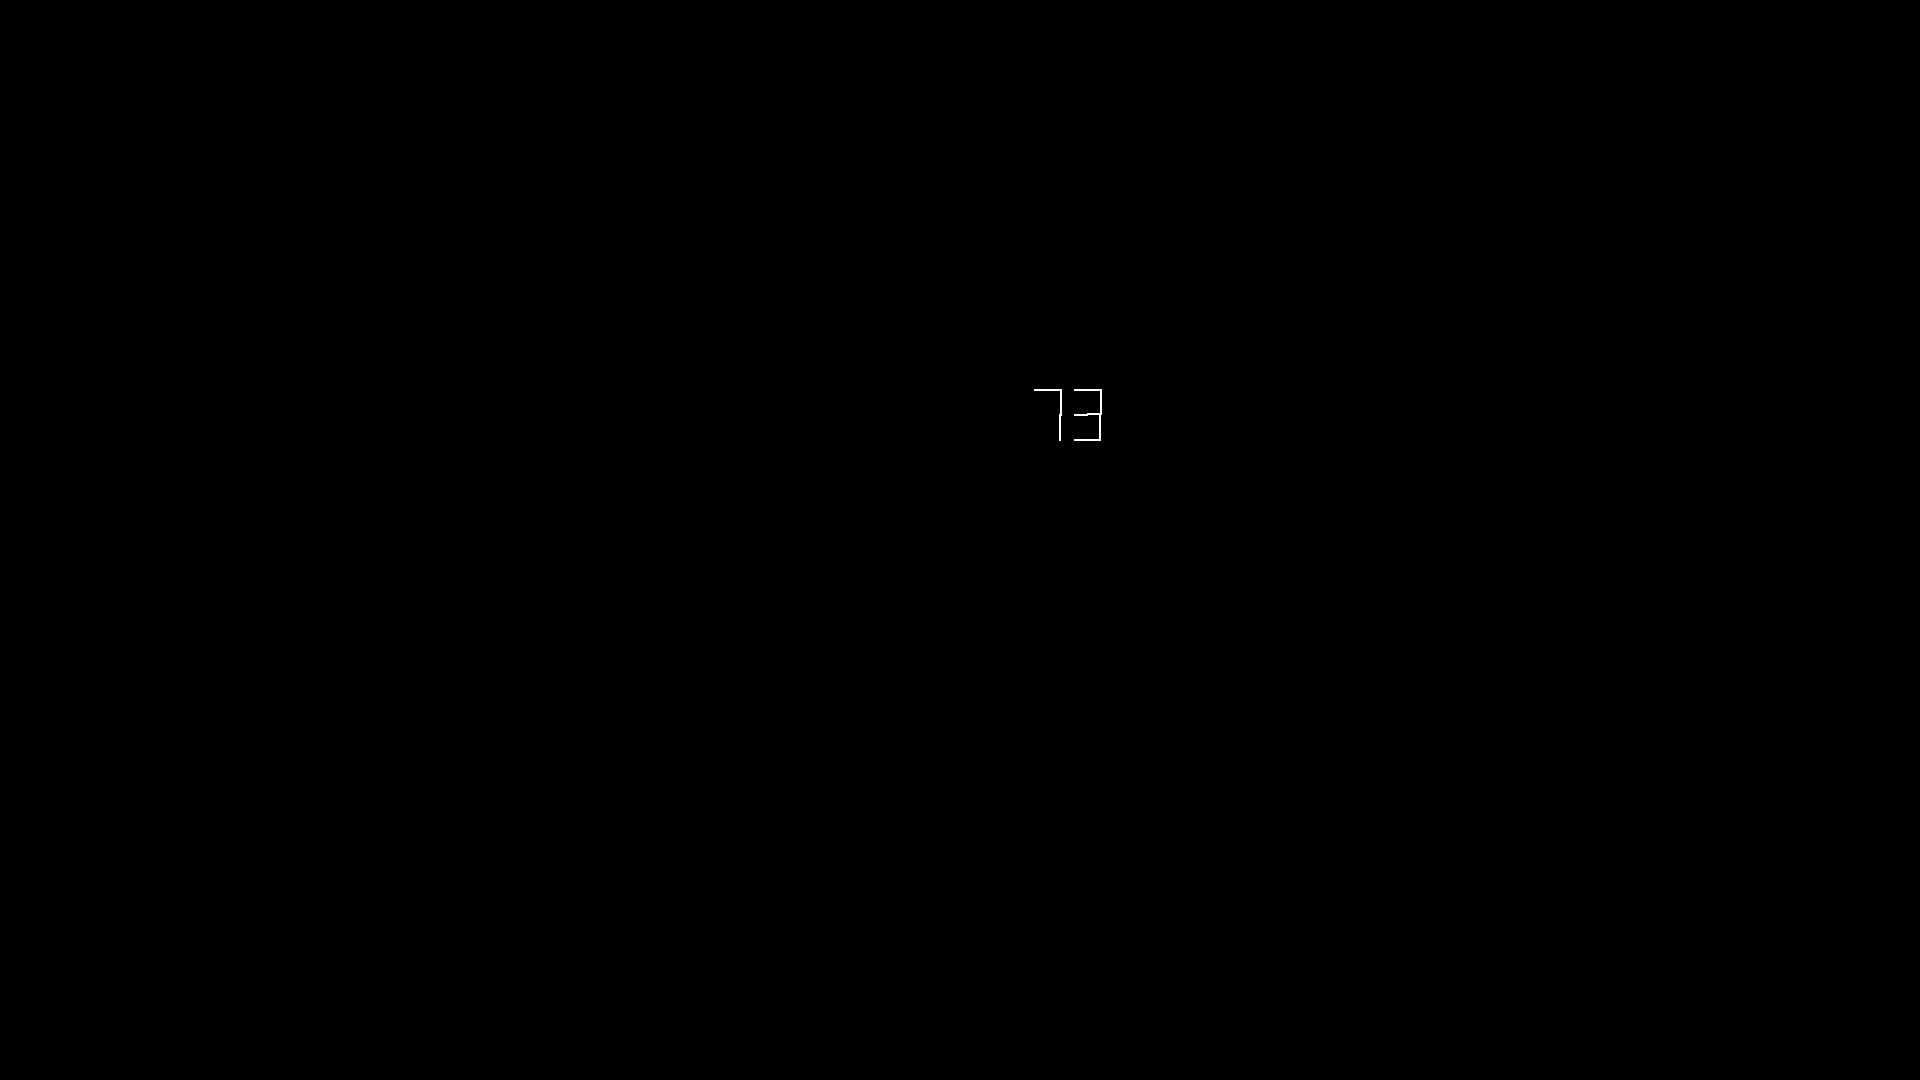

In [11]:
from IPython.display import display
from PIL import Image

# Let's render something!


img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))